```{admonition} Lecture Materials
:class: tip
[Download the slide deck for this lecture](/_static/pdf/Lecture17-RandomNumbers.pdf)
```

# Uniform random numbers

Applications of Monte Carlo methods on a computer almost always start with generating a sequence of uniformly distributed random numbers.
There is usually a basic routine that generates a random integer number $x$ between 0 and some maximum value $m$. By dividing over $m$ one can get a real pseudo-random number $\eta = x/m$ which is uniformly distributed in an interval $\eta \in [0,1)$. By applying various transformations and techniques to the sequence of $\eta$ one can obtain various other distributions.

The general application of random numbers thus proceeds as follows:

- The basic routine produces a random integer number $x$ between 0 and some maximum value $m$. 

- By dividing over $m$ one can get a real pseudo-random number $\eta = x/m$ which is uniformly distributed in an interval $\eta \in [0,1)$.

- By applying various transformations and techniques to the sequence of $\eta$ one can sample other (non-uniform) distributions.

How to sample pseudo-random numbers $x$?


## Linear congruential generator

> **⚠️ Warning**: Linear congruential generators (LCGs) have known limitations and should not be used in practice for serious applications. They have short periods and can generate numbers that are not uniformly distributed across the desired space. Consider using more robust random number generators, such as the Mersenne Twister, for better randomness and reliability.


Historically, one of the simplest generators is linear congruential generator (LCG).
Although it should not be used in practice, it illustrates some of the key concepts and issues.

It generates a sequence of pseudo-random numbers in accordance with an iterative procedure
$$
x_{n+1} = (a x_n + c) ~ \text{mod} ~ m,
$$
for some parameters $a,c,m$.

It is clear that the next number only depends on the present value, and that the sequence of numbers will be periodic, with a period of at most $m$.

In [1]:
import numpy as np

# Linear congruential generator

# Parameters (based on Numerical Recipes)
lcg_a = 1664525
lcg_c = 1013904223
lcg_m = 4294967296

# Current value (initial seed)
lcg_x = 1

def lcg():
    global lcg_x
    lcg_x = (lcg_a * lcg_x + lcg_c)%lcg_m
    return lcg_x

Plot the sequence of random numbers generated by the LCG.

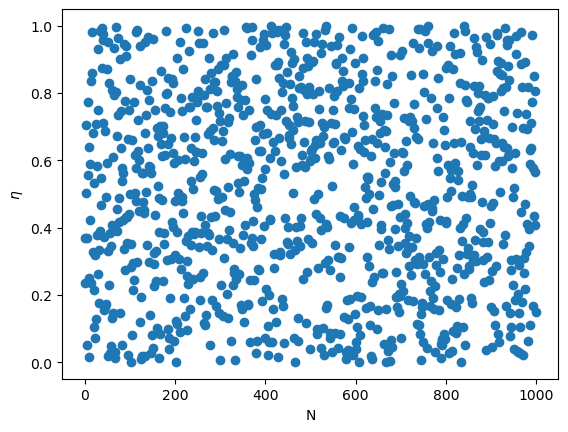

In [2]:
# Plot
import matplotlib.pyplot as plt

results = []

N = 1000
for i in range(N):
    results.append(lcg()/lcg_m)
    
plt.xlabel("N")
plt.ylabel("${\eta}$")
plt.plot(results,"o")
plt.show()

LCG has a rather short period (about $2^{32}$ for 32-bit integers).
Even more critically, it is not a good generator for high dimensions.
LCG typically generates numbers across a hyperplane (rather than the full space), if random numbers are to be regarded as components $(x,y,z,...)$ of a vector.

Let us plot the distribution of random numbers in 2D, by treating the random numbers as components of a 2D vector.
For a good choice parameters and small dimension this issue maybe less visible.


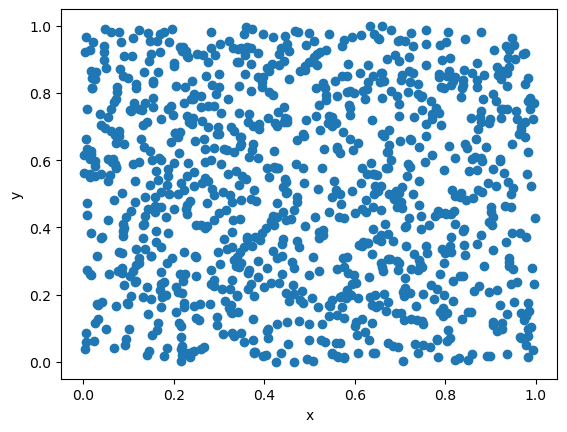

In [3]:
# 2D plot

resultsx = []
resultsy = []

N = 1000
for i in range(N):
    resultsx.append(lcg()/lcg_m)
    resultsy.append(lcg()/lcg_m)
    
plt.plot(resultsx,resultsy,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

But for other parameters the artifacts are clearly visible already in 2D:

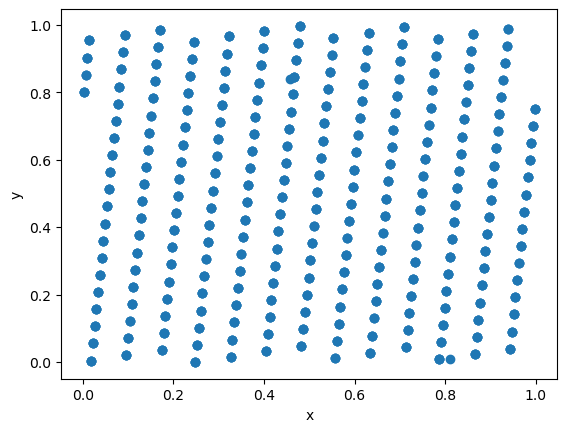

In [4]:
# Slightly different choice of m
lcg_m = 3000000000

resultsx = []
resultsy = []

N = 1000
for i in range(N):
    resultsx.append(lcg()/lcg_m)
    resultsy.append(lcg()/lcg_m)
    
plt.plot(resultsx,resultsy,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

For this reason LCG should not be used in any serious calculations.
Although most languages provide a good random number generator, there are some exceptions, such as `rand()` function in C++.

## Mersenne Twister

Other methods have been developed over the years. 
The general method of choice is often the **Mersenne Twister** random number generator which is implemented by default in many programming environments. It has a long period of $2^{19937} - 1$, passes most statistical randomness tests, fast, and suitable for most physical applications.

We will not reimplement it here but take it for granted.
Here is a simple example of how to use it:

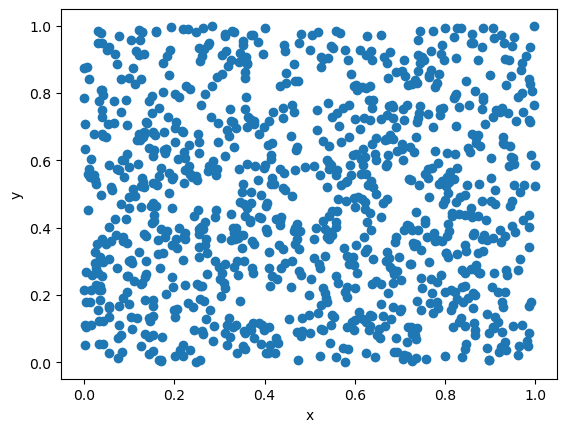

In [5]:
# Use Mersenne Twister
import numpy as np

np.random.rand() # Random number \eta uniformly distributed over (0,1)

resultsx = []
resultsy = []

N = 1000
for i in range(N):
    resultsx.append(np.random.rand())
    resultsy.append(np.random.rand())
    
plt.plot(resultsx,resultsy,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Random seed

Most RNGs (like LCG, Mersenne Twister,…) maintain state variables and 
iteratively generate a pre-determined sequence of numbers.
For this reason, the sequence of numbers generated by the RNG is called pseudo-random numbers.

The initial state of the RNG is called the seed. 
Running the same seed will generate the same sequence of numbers.

The following example will generate two sets of random numbers using the same seed. They will yield identical scatter plots.

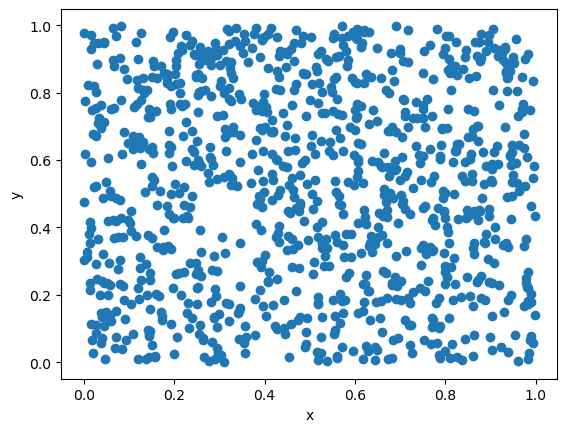

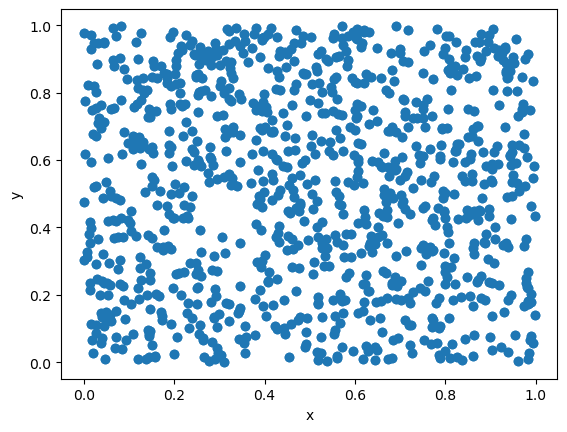

In [6]:
resultsx = []
resultsy = []

N = 1000
np.random.seed(1)
for i in range(N):
    resultsx.append(np.random.rand())
    resultsy.append(np.random.rand())
    
plt.plot(resultsx,resultsy,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

np.random.seed(1)
for i in range(N):
    resultsx.append(np.random.rand())
    resultsy.append(np.random.rand())
    
plt.plot(resultsx,resultsy,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We thus see that generating pseudo-random numbers is a deterministic process.
It has certain advantages, but also requires care.

The deterministic nature for a specified seed is useful for *debugging the code*, since the sequence of pseudo-random numbers can be guaranteed to be the same, and the error will thus be reproduced each time.
If the numbers were truly random, we would not be able to reproduce the same sequence and the debugging would be much more difficult.

However, one should be careful when using the same seed in different runs, for instance on a computer cluster.
If the same seed is used in different runs, the same sequence of pseudo-random numbers will be generated, and no parallelization will be achieved.

## Simulation example: Radioactive decay

Some physical processes are truly random (recall quantum mechanics), for instance radioactive decay.

The number of radioactive isotopes with a half-life of $\tau$ evolves as

$$
N(t) = N(0) 2^{-t/\tau},
$$

therefore, the probability for a single atom to decay over the time interval $t$ is 

$$
p(t) = 1 - 2^{-t/\tau}.
$$

Let us simulate the time evolution for a sample of thallium atoms decaying (half-life of $\tau = 3.053$ minutes) into lead atoms.

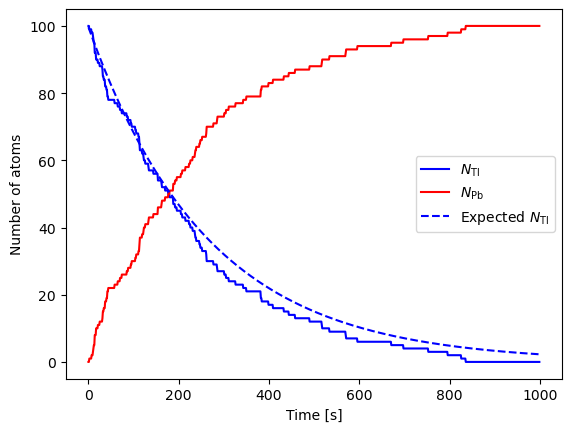

In [7]:
# Decay constants
NTl = 100            # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time
ctime = 0             # Current time

# Lists of plot points
tpoints = np.arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []
TlpointsTh = [] # Expected number

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if np.random.rand()<p:
            decay += 1
    NTl -= decay
    NPb += decay
    
    ctime += h
    TlpointsTh.append((NTl + NPb) * 2**(-ctime/tau))
    

# Make the graph
plt.plot(tpoints,Tlpoints,color='b',label="${N_{\\rm Tl}}$")
plt.plot(tpoints,Pbpoints,color='r',label="${N_{\\rm Pb}}$")
plt.plot(tpoints,TlpointsTh,linestyle='--',color='b',label="Expected ${N_{\\rm Tl}}$")
plt.xlabel("Time [s]")
plt.ylabel("Number of atoms")
plt.legend()
plt.show()

Increase the number of atoms

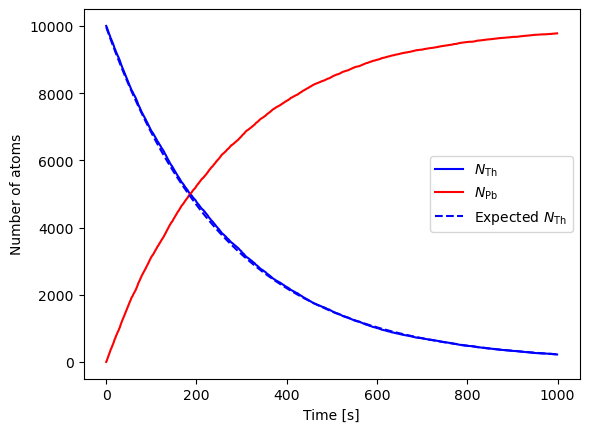

In [ ]:
# Decay constants
NTl = 10000            # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time
ctime = 0             # Current time

# Lists of plot points
tpoints = np.arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []
TlpointsTh = [] # Expected number

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if np.random.rand()<p:
            decay += 1
    NTl -= decay
    NPb += decay
    
    ctime += h
    TlpointsTh.append((NTl + NPb) * 2**(-ctime/tau))
    

# Make the graph
plt.plot(tpoints,Tlpoints,color='b',label="${N_{\\rm Tl}}$")
plt.plot(tpoints,Pbpoints,color='r',label="${N_{\\rm Pb}}$")
plt.plot(tpoints,TlpointsTh,linestyle='--',color='b',label="Expected ${N_{\\rm Tl}}$")
plt.xlabel("Time [s]")
plt.ylabel("Number of atoms")
plt.legend()
plt.show()

## Example: Brownian motion

Brownian motion is a motion of a particle in a gas buffered by collisions with the gas particles.

We can consider a simplified 2D motion of particle by randomly making a small step at each iteration in one of the four directions.
To simulate the random choice of direction, we sample a random integer number from the interval $[0,3]$ by taking a modulo over 4. In Python, this can be done using the `np.random.randint` function.

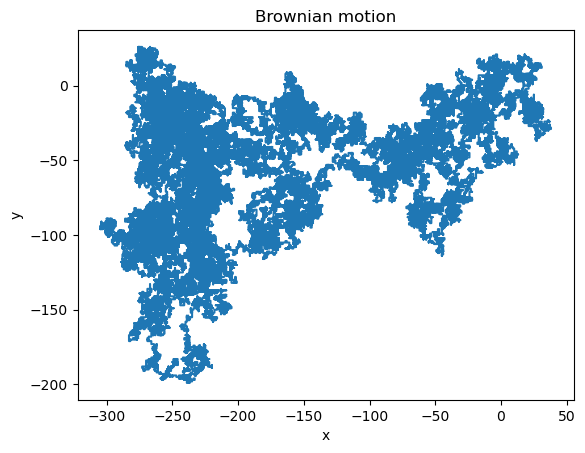

In [9]:
N = 100000
x = 0
y = 0

dirs = [ [1,0], [-1,0], [0,1], [0,-1] ]

points_x = [x]
points_y = [y]
for i in range(N):
    direction = np.random.randint(4)
    x += dirs[direction][0]
    y += dirs[direction][1]
    points_x.append(x)
    points_y.append(y)
    
plt.title("Brownian motion")
plt.plot(points_x,points_y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()